### 1. Problem Statement

Due to prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

### 2. Objective

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.

### 3. Import all scientific and visualization packages

In [0]:
import pandas as pd                                            # package to manipulate dataframe
import numpy as np                                             # scientific computing package
from sklearn.model_selection import train_test_split           # splitting the data into train and test
from sklearn.linear_model import LogisticRegression            # Building the Logistic Regression model
from sklearn.ensemble import RandomForestClassifier            # Building the Random Forest Regression model
from sklearn.model_selection import GridSearchCV               # perform grid search to build Random forets model
from sklearn import metrics                                    # Metrics to evalaute the model
from sklearn.metrics import roc_curve, auc                     # Metrics to evalaute the model


## visualization packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


### 4. Loading the datasets

In [0]:
!wget https://www.dropbox.com/s/4ep00wfljkogrmo/creditcard.csv   # Loading the credit card.csv dataset from dropbox

--2019-08-29 11:05:55--  https://www.dropbox.com/s/4ep00wfljkogrmo/creditcard.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4ep00wfljkogrmo/creditcard.csv [following]
--2019-08-29 11:05:55--  https://www.dropbox.com/s/raw/4ep00wfljkogrmo/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c6af488c2ea6138f93290fd0d.dl.dropboxusercontent.com/cd/0/inline/Anjc-IPICs1yZcOtGHFXCjMDomR7KOBTjopia4ktMcOVw-D1BSMiM9RC0QeLWIECZJhAL_nqJ3KBFio3mcyuimXjgN-h4pjmDgFAyzjSSYEPdzF-t1TUOJgrGGpERIiuRPM/file# [following]
--2019-08-29 11:05:56--  https://uc9c6af488c2ea6138f93290fd0d.dl.dropboxusercontent.com/cd/0/inline/Anjc-IPICs1yZcOtGHFXCjMDomR7KOBTjopia4ktMcOVw-D1BSMiM9RC0QeLWIECZJhAL_nqJ3KBFio3mcyuimXjgN-h4pjmDgFAyzjSSYEP

In [0]:
credit_card_df = pd.read_csv('creditcard.csv')                     # Reading the dataframe

In [0]:
credit_card_df.shape                                               # Checking the number of rows and columns

(284807, 31)

In [0]:
# print the first 5 rows of data
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 4.1 Understand datatypes present in dataframe

In [0]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are no missing values in this dataframe. So data imputation is **not** required.

### 5. Data Visualization

#### 5.1 Distribution of amount in credit card transactions

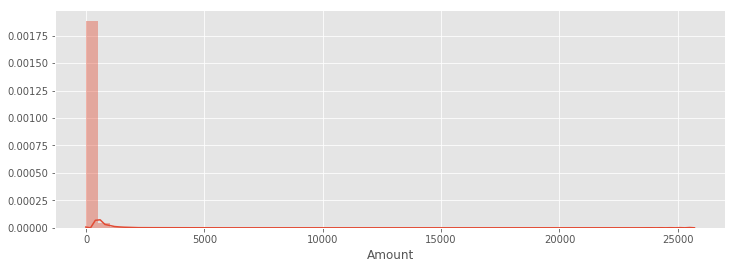

In [0]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))                                 # Setting the figure size
sns.distplot(credit_card_df['Amount'])                     # Creating the histogram

The distribution is right skewed with very less transactions towards the higher amounts.

#### 5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.

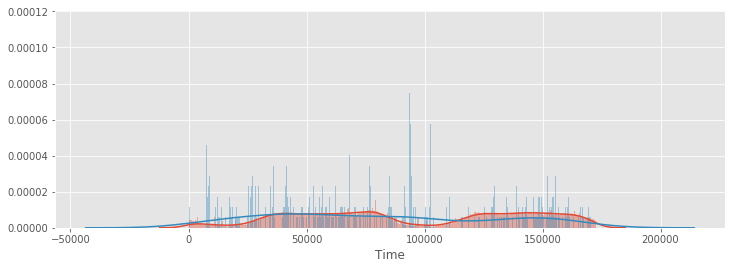

In [0]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")                                                              # Setting the color code
sns.distplot(credit_card_df['Time'],kde=True,bins=480)                                     # distribution of time
sns.distplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],kde=True,bins=480)   # where there are fraudulant transaction


The time for fraudulent transactions is almost uniformly distributed with a certain level of **repetition or seasonality** after some interval of time.

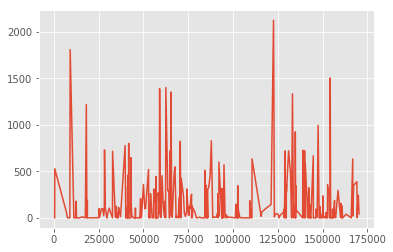

In [0]:
credit_card_df.loc[credit_card_df['Class'] == 1, 'Time']
# x-axis is Time, y-axis is amount
plt.plot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],credit_card_df.loc[credit_card_df['Class'] == 1, 'Amount']) 
plt.show()

#### 5.3 Distribution of V4 for fraudulent and non fraudulent transactions

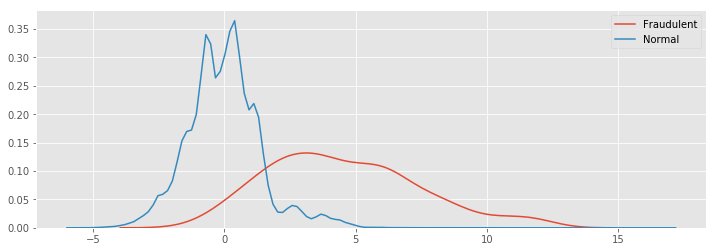

In [0]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")


# Distribution of fraudulent and normal transaction for column V4
sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'V4'],label='Fraudulent')
sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 0, 'V4'],label='Normal')


It is quite evident that fraudulent and normal transactions are almost separated through this graph with the help of V4 attribute.

#### 5.4 Scatter plot between time of transaction and amount of transaction

<Figure size 1080x720 with 0 Axes>

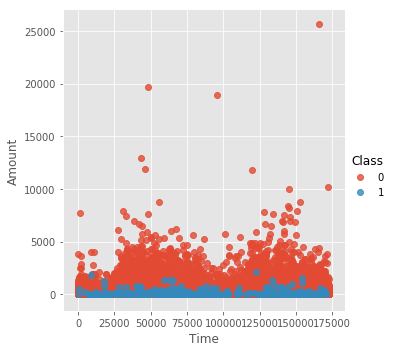

In [0]:
plt.figure(figsize=(15,10))
sns.lmplot('Time',                # Horizontal axis
           'Amount',              # Vertical axis
           data=credit_card_df,   # Data source
           fit_reg=False,         # Don't fix a regression line
           hue="Class",           # Set color
        ) 


It is evident that Fraudulent transactions are mostly below an amount of 1000 and never more than that.

#### 5.5 Correlation Heatmap

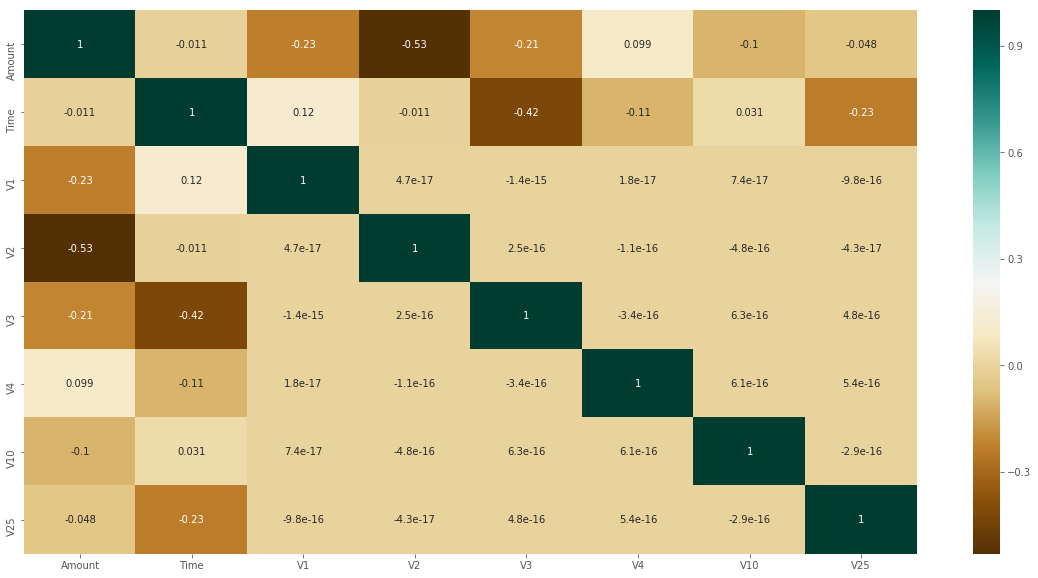

In [0]:
plt.figure(figsize=(20,10))
c = credit_card_df[['Amount','Time','V1','V2','V3','V4','V10','V25']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Amount is negatively correlated with V2
Time is negatively correlated with V3

### 6. Handle imbalanced data using SMOTE

#### 6.1 Prepare the data

In [0]:
X = credit_card_df.drop(['Class'],axis=1)

y = credit_card_df.Class

In [0]:
y.value_counts()                              # Checking the number of fraudulant and normal transactions

0    284315
1       492
Name: Class, dtype: int64

The classes are highly imbalanced. We need to use SMOTE technique to balance the labels.

In [0]:
!pip install imblearn                         # Installing the smote package

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')                  # To resample the minority class
X_sm, y_sm = smote.fit_sample(X, y)              # Fit SMOTE on the data

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

In [0]:
X_train.shape                                    # Checking the number of rows and columns

(380982, 30)

#### 6.2 Train a logistic regression model

In [0]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.9724270975443383


In [0]:
# examine the class distribution of the testing set
pd.Series(y_test).value_counts()

1    93873
0    93775
dtype: int64

In [0]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

1    0.500261
dtype: float64

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [0]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[92328  1447]
 [ 3727 90146]]


Here the false negatives are very high which means around 1365 are wrongly classifed as non-defaulters when in reality they are defaulters.

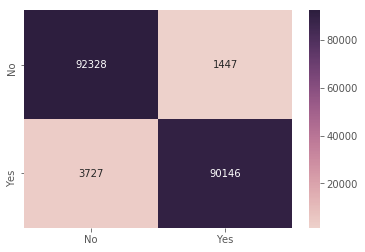

In [0]:
# Visualizing the confusion matrix

cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [0]:
predict_probabilities = logreg.predict_proba(X_test)          # Predict the probability values for X_test
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

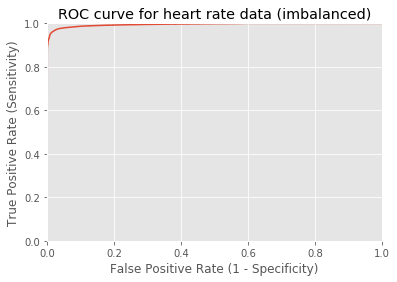

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.994694


## Train a Random forest regression model**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9998134805593452
Confusion Metrix:
 [[93754    14]
 [   21 93859]]


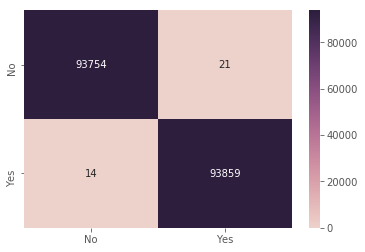

In [0]:

#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)

# Train test Split using SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#learning
model.fit(X_train,y_train)

#Prediction
prediction=model.predict(X_test)


#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

# Visualizing the confusion matrix
conf=metrics.confusion_matrix(y_test, prediction)


cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

**Using hyper parameter in random forest classifier**

In [0]:


#making the instance
model=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          }

#Making models with hyper parameters sets
modelA = GridSearchCV(model, param_grid=params )


# Train test Split using SMOTE
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#learning 
modelA.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",modelA.best_params_)

#Prediction
prediction=modelA.predict(X_test)


#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

# Visualizing the confusion matrix
conf=metrics.confusion_matrix(y_test, prediction)


cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: ignored